In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from vidaug import augmentors as va
import torchvision

sys.path.append('../src/')
from utils import read_clip
from avg_video import avg_video

In [20]:
type(va.HorizontalFlip())

vidaug.augmentors.flip.HorizontalFlip

In [3]:
DATA_DIR = Path('../data/')
CLASSES = ["bridge_down", "bridge_up", "no_action", "train_in_out"]
SEED = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
train_clips = sum([list(DATA_DIR.joinpath("train", c).glob("*.mp4")) for c in CLASSES], [])
train_clips = pd.DataFrame([clip.parts[-2:] for clip in train_clips], columns=["label", "fname"])

train_clips

,label,fname
0,bridge_down,67f2ef6e74a93504.mp4
1,bridge_down,b9badc8dd567155f.mp4
2,bridge_down,88c00402cdad6b36.mp4
3,bridge_down,d606865a8dce4179.mp4
4,bridge_down,ea1bf78e20cd4c63.mp4
...,...,...
491,train_in_out,d2987e35db4635c9.mp4
492,train_in_out,4fca1d1c23743300.mp4
493,train_in_out,68c64df10445214a.mp4
494,train_in_out,2ce08918cccbf9d0.mp4


In [21]:
sample_clip = train_clips.sample(100, random_state=SEED).iloc[50]
sample_clip_path = DATA_DIR.joinpath("train", sample_clip.label)
clip = read_clip(sample_clip_path, sample_clip.fname, transposed=False)

In [22]:
sample_clip_path

PosixPath('../data/train/train_in_out')

In [23]:
clip.shape

(256, 240, 320, 3)

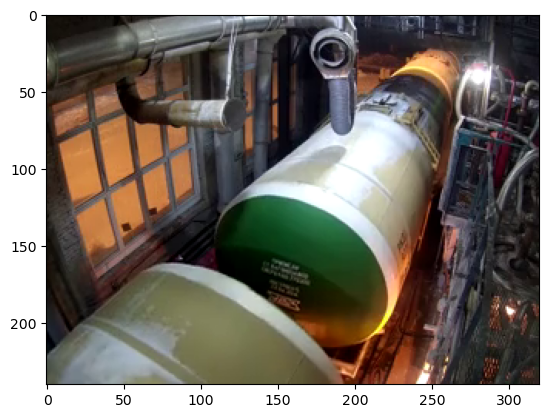

In [24]:
plt.imshow(clip[5]);

In [25]:
augmentations = [
    None,
    va.RandomCrop(size=(240, 260)),
    va.GaussianBlur(sigma=1),
    va.Add(value=20),
    va.Add(value=-20),
    va.HorizontalFlip()
]

In [26]:
augmentation = np.random.choice(augmentations)
augmentation

In [27]:
clip_aug = np.array(augmentation(clip))
clip_avg = avg_video(clip_aug)

In [28]:
clip_avg.shape

(240, 320, 3)

In [29]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((180, 180)),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
])

In [30]:
transforms(clip_avg).shape

/home/student/anaconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 180, 180])

In [32]:
type(augmentation)

vidaug.augmentors.intensity.Add

In [295]:
seq = va.Sequential([
    va.RandomCrop(size=(240, 260)), # randomly crop video with a size of (240 x 180)
    va.GaussianBlur(sigma=1),
    va.Add(value=20),
    va.Add(value=-20),
    va.HorizontalFlip()
])

In [296]:
clip_aug = np.array(seq(clip))

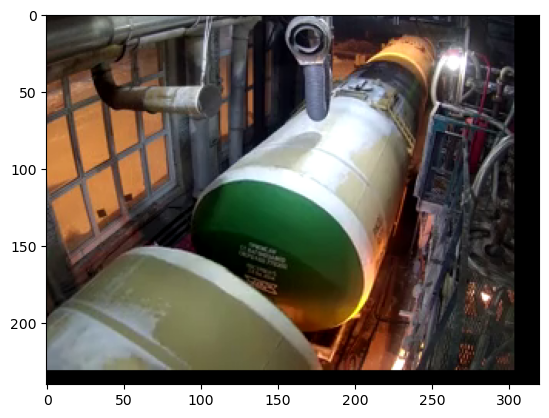

In [297]:
plt.imshow(clip_aug[1]);

In [298]:
clip_aug_avg = avg_video(clip_aug)

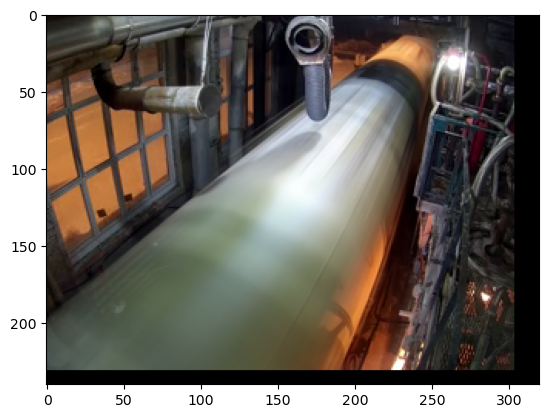

In [300]:
plt.imshow(clip_aug_avg)